# **The basics of TensorBoard in Data Science!**

## **Written by:** [Aarish Asif Khan](https://www.kaggle.com/aarishasifkhan)

##  **Date:** 27th March 2024

## **Website of Tensorflow:** [Tensorflow Org](https://www.tensorflow.org/guide/basics)

In this notebook, We are going to understand the basic concepts of Tensorboard. Now, you might be wondering what the heck is Tensorboard???

Well, Tensorboard is a visualization tool for machine learning. It is used to visualize the training
progress of a machine learning model.

For more Information, check out Tensorboard's documentation here:
https://www.tensorflow.org/tensorboard/get_started

In [23]:
# !pip install TensorBoard

In [11]:
# Import necessary libraries
from tensorflow.keras.models import Sequential

import tensorflow as tf 
from tensorflow.keras.layers import Dense

from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import TensorBoard

In [12]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Ignore warnings from Output
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [14]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [15]:
print(x_train.shape) # Shape of x train

print(y_train.shape) # Shape of y train

(60000, 28, 28)
(60000,)


In [16]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

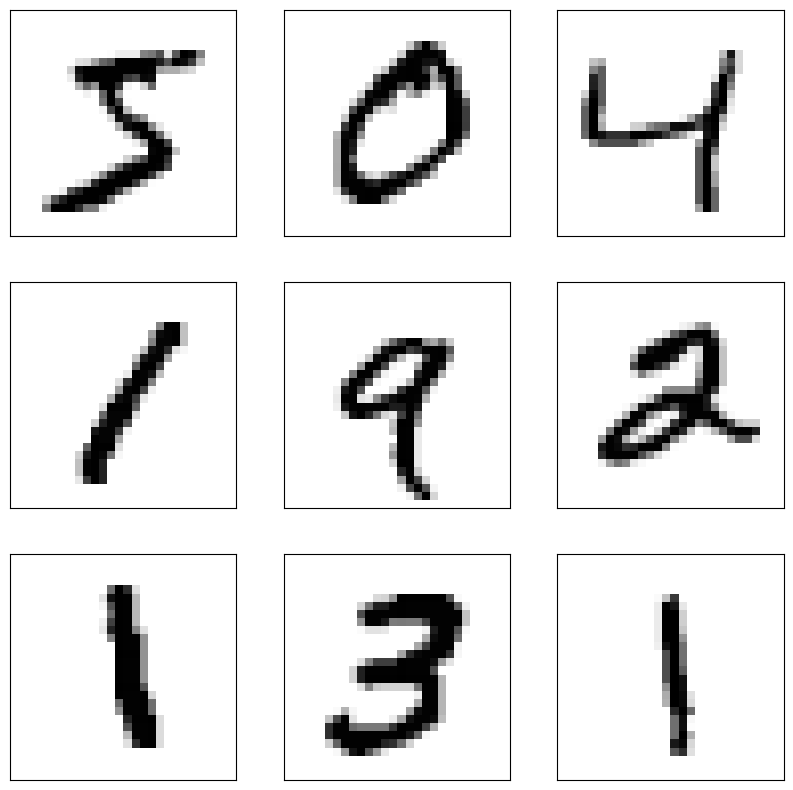

In [17]:
# Plot the first 9 images in the dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    
plt.show()

In [18]:
# Create a Convolutional Neural Network
model = Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((1,1)),  # Modify the pool size to match the output shape
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),  # Add dropout layer with a dropout rate of 0.2
    tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
# Compile the model 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.6307 - loss: 1.0716 - val_accuracy: 0.9514 - val_loss: 0.1675
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8695 - loss: 0.3961 - val_accuracy: 0.9617 - val_loss: 0.1278
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.8994 - loss: 0.3146 - val_accuracy: 0.9698 - val_loss: 0.1008
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.9101 - loss: 0.2769 - val_accuracy: 0.9739 - val_loss: 0.0924
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.9206 - loss: 0.2451 - val_accuracy: 0.9764 - val_loss: 0.0813


In [24]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9715 - loss: 0.0956
Test accuracy: 0.9764000177383423


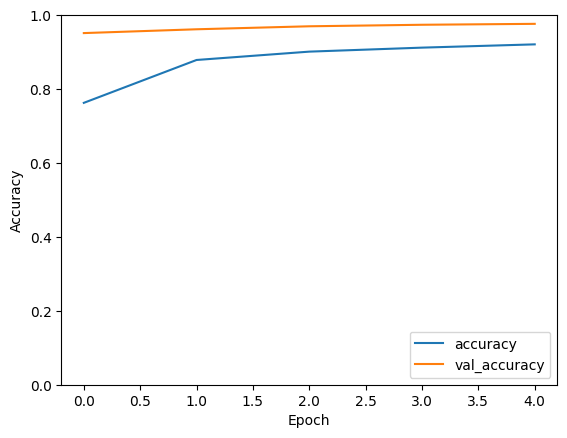

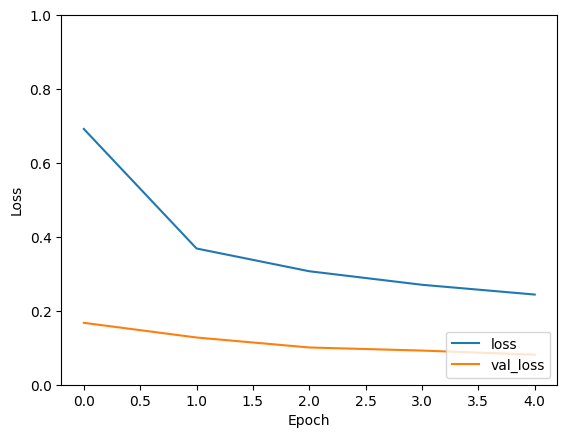

In [25]:
# Plot the training and validation accuracy, training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# **Lets apply this in TensorBoard**

It's very easy to apply all of this in Tensorboard, you just have to make a `callback function` and  call it at the end of your training loop. Than, you just have to activate the Tensorboard

In [26]:
# Create a Convolutional Neural Network
model = Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((1,1)),  # Modify the pool size to match the output shape
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),  # Add dropout layer with a dropout rate of 0.2
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# Create a callback function
callback = TensorBoard(log_dir="./logs", histogram_freq=1)

In [28]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_test, y_test),
                    callbacks=[callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 27ms/step - accuracy: 0.6080 - loss: 1.1062 - val_accuracy: 0.9465 - val_loss: 0.1967
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 15ms/step - accuracy: 0.8496 - loss: 0.4365 - val_accuracy: 0.9635 - val_loss: 0.1357
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8818 - loss: 0.3568 - val_accuracy: 0.9668 - val_loss: 0.1161
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8920 - loss: 0.3260 - val_accuracy: 0.9708 - val_loss: 0.1008
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9010 - loss: 0.2999 - val_accuracy: 0.9747 - val_loss: 0.0912


In [29]:
# Activate Tensorboard extension
%load_ext tensorboard

In [33]:
# Run Tensorboard
%tensorboard --logdir=./logs

Reusing TensorBoard on port 6006 (pid 14652), started 0:03:55 ago. (Use '!kill 14652' to kill it.)